In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, Image
from os import getcwd
from PIL import Image as PILImage
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import xml.etree.ElementTree as ET
import shutil
import random
import glob


In [13]:
# directory structure

for dirname, _, filenames in os.walk("pool-dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

pool-dataset/testing/images/000000000.jpg
pool-dataset/testing/images/000000001.jpg
pool-dataset/testing/images/000000002.jpg
pool-dataset/testing/images/000000003.jpg
pool-dataset/testing/images/000000004.jpg
pool-dataset/testing/images/000000005.jpg
pool-dataset/testing/images/000000006.jpg
pool-dataset/testing/images/000000007.jpg
pool-dataset/testing/images/000000008.jpg
pool-dataset/testing/images/000000009.jpg
pool-dataset/testing/images/000000010.jpg
pool-dataset/testing/images/000000011.jpg
pool-dataset/testing/images/000000012.jpg
pool-dataset/testing/images/000000013.jpg
pool-dataset/testing/images/000000014.jpg
pool-dataset/testing/images/000000015.jpg
pool-dataset/testing/images/000000016.jpg
pool-dataset/testing/images/000000017.jpg
pool-dataset/testing/images/000000018.jpg
pool-dataset/testing/images/000000019.jpg
pool-dataset/testing/images/000000020.jpg
pool-dataset/testing/images/000000021.jpg
pool-dataset/testing/images/000000022.jpg
pool-dataset/testing/images/000000

In [22]:
def parse_xml(file):
    tree = ET.parse(file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):
        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = round(float(boxes.find("bndbox/ymin").text))
        xmin = round(float(boxes.find("bndbox/xmin").text))
        ymax = round(float(boxes.find("bndbox/ymax").text))
        xmax = round(float(boxes.find("bndbox/xmax").text))

        list_with_all_boxes.append([xmin, ymin, xmax, ymax])

    return filename, list_with_all_boxes

In [26]:
# Visualize image with bounding box

def visualize_image(image_folder, label_folder, label_file):
    image_file, boxes = parse_xml(os.path.join(label_folder, label_file)) # for example labels/0001.xml

    img = cv2.imread(os.path.join(image_folder, image_file))
    for box in boxes:
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [16]:
image_dir = "pool-dataset/training/images"
label_dir = "pool-dataset/training/labels"

In [17]:
label_files = random.sample(os.listdir(label_dir), 10)

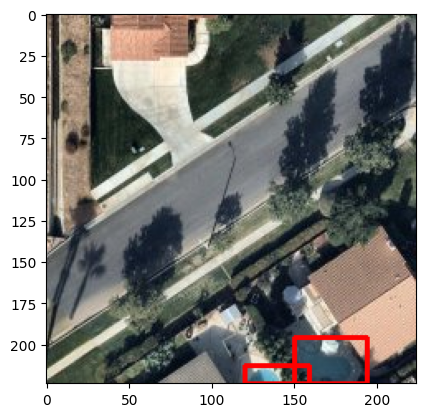

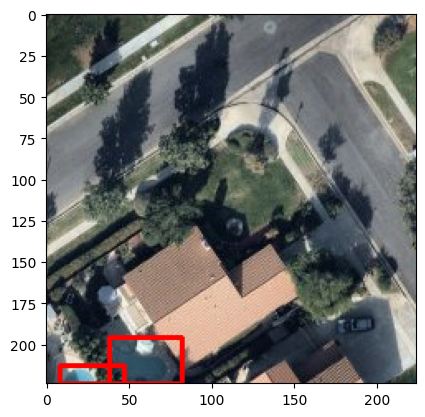

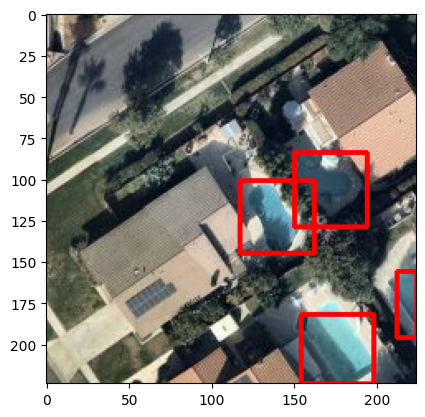

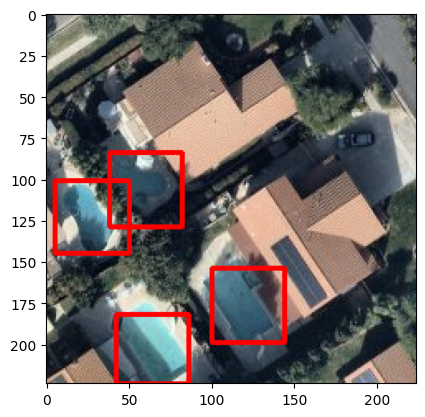

FileNotFoundError: [Errno 2] No such file or directory: 'pool-dataset/training/labels/000000016.xml'

In [27]:
for lab_file in label_files:
    visualize_image(image_dir, label_dir, lab_file)